## DS II - Group 16 project
We chose to analyse a dataset that describes characteristics of the breast cancer cells extracted from digitized image breast mass and build a Logistic Regression ML model to predict whether the cancer is benign or malignant.


### 1- The dataset
Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
The data set contains 569 records of and 32 features representing various tumor characteristics measurement, extracted from radiology imagery, that could be useful in predicting tumor malignancy.

### 2- Dataset Exploration and Cleaning
We dropped unnecessary columns in our dataset that provide our model with no useful data, as well as turn the categorical variable that we are trying to predict into an encoding of ones and zeroes.

### 3- Feature Selection
We used variables correlation coefficients to identify a representative set of features from which to construct a classification model for tumor malignacy. We calculated the dataset variables correlation matrix and for every variable pair with a correlation coefficient greater that 0.9 we retained only one variable. 

### 4- Dataset Predictors and Predicted Bivariate Analysis 
We took a look at the dataset predictors themselves to see if they can provide any additional insight prior to our logistic regression model.

### 5- Outliers Detection
The detection of outliers is important for logistic regression as outliers have a considerable influence on the analysis results and could affect the model prediction accuracy. 
Many procedures for the identification of outliers in logistic regression are available in the literature. 
In this project, we used the variables probability distribution plot and the skewness value.

### 6- Logistic Regression Model and Evaluation
We performed the logistic regression using statsmodel and sklearn and evaluated our model's performance by looking at metrics such as accuracy, precision, recall, R-squared and MSE.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import floor, ceil
import scipy.stats as stats

In [6]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### The Dataset

In [7]:
data = pd.read_csv('data.csv')

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Dataset Exploration and Cleaning

In [10]:
# Look at the data types to see which columns need to be encoded.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see from the info above that the 'diagnosis' variable is categorical and needs to be encoded for our model. We can also see that there is a column called 'Unnamed: 32' that doesn't contain any data - we should drop this column completely so that we are able to reduce the number of features we are working with. This is also the case for the 'id' variable that doesn't provide our model with any value at all.

Additionally, there are a few column names that contain spaces. We should rename these columns for consistency.

In [11]:
data = data.rename(columns={'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
# Drop 'id' and 'Unnamed: 32' columns
data = data.drop(['id', 'Unnamed: 32'],axis=1)

In [13]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
# Change diagnosis 'M' values to 1 and 'B' values to 0.
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Verifying that we still have the same number of data points after we encoded the diagnosis variable to ones and zeroes.
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

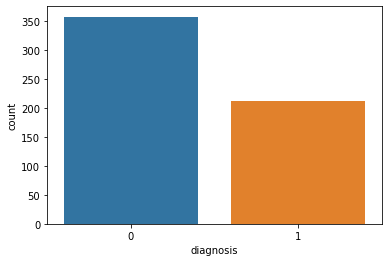

In [16]:
sns.countplot(x='diagnosis',data=data)

When working with a logistic regression model, we genrally want our response variable to have approximately the same number of zeroes and ones so that our model can be trained with roughly equal buckets for each value. In this case, we have more zeroes than ones but we believe that 212 malignant cases should be sufficient in a dataset containing 569 data points.

In [17]:
# Calculate descriptive statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [18]:
# Check for null values in dataset
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

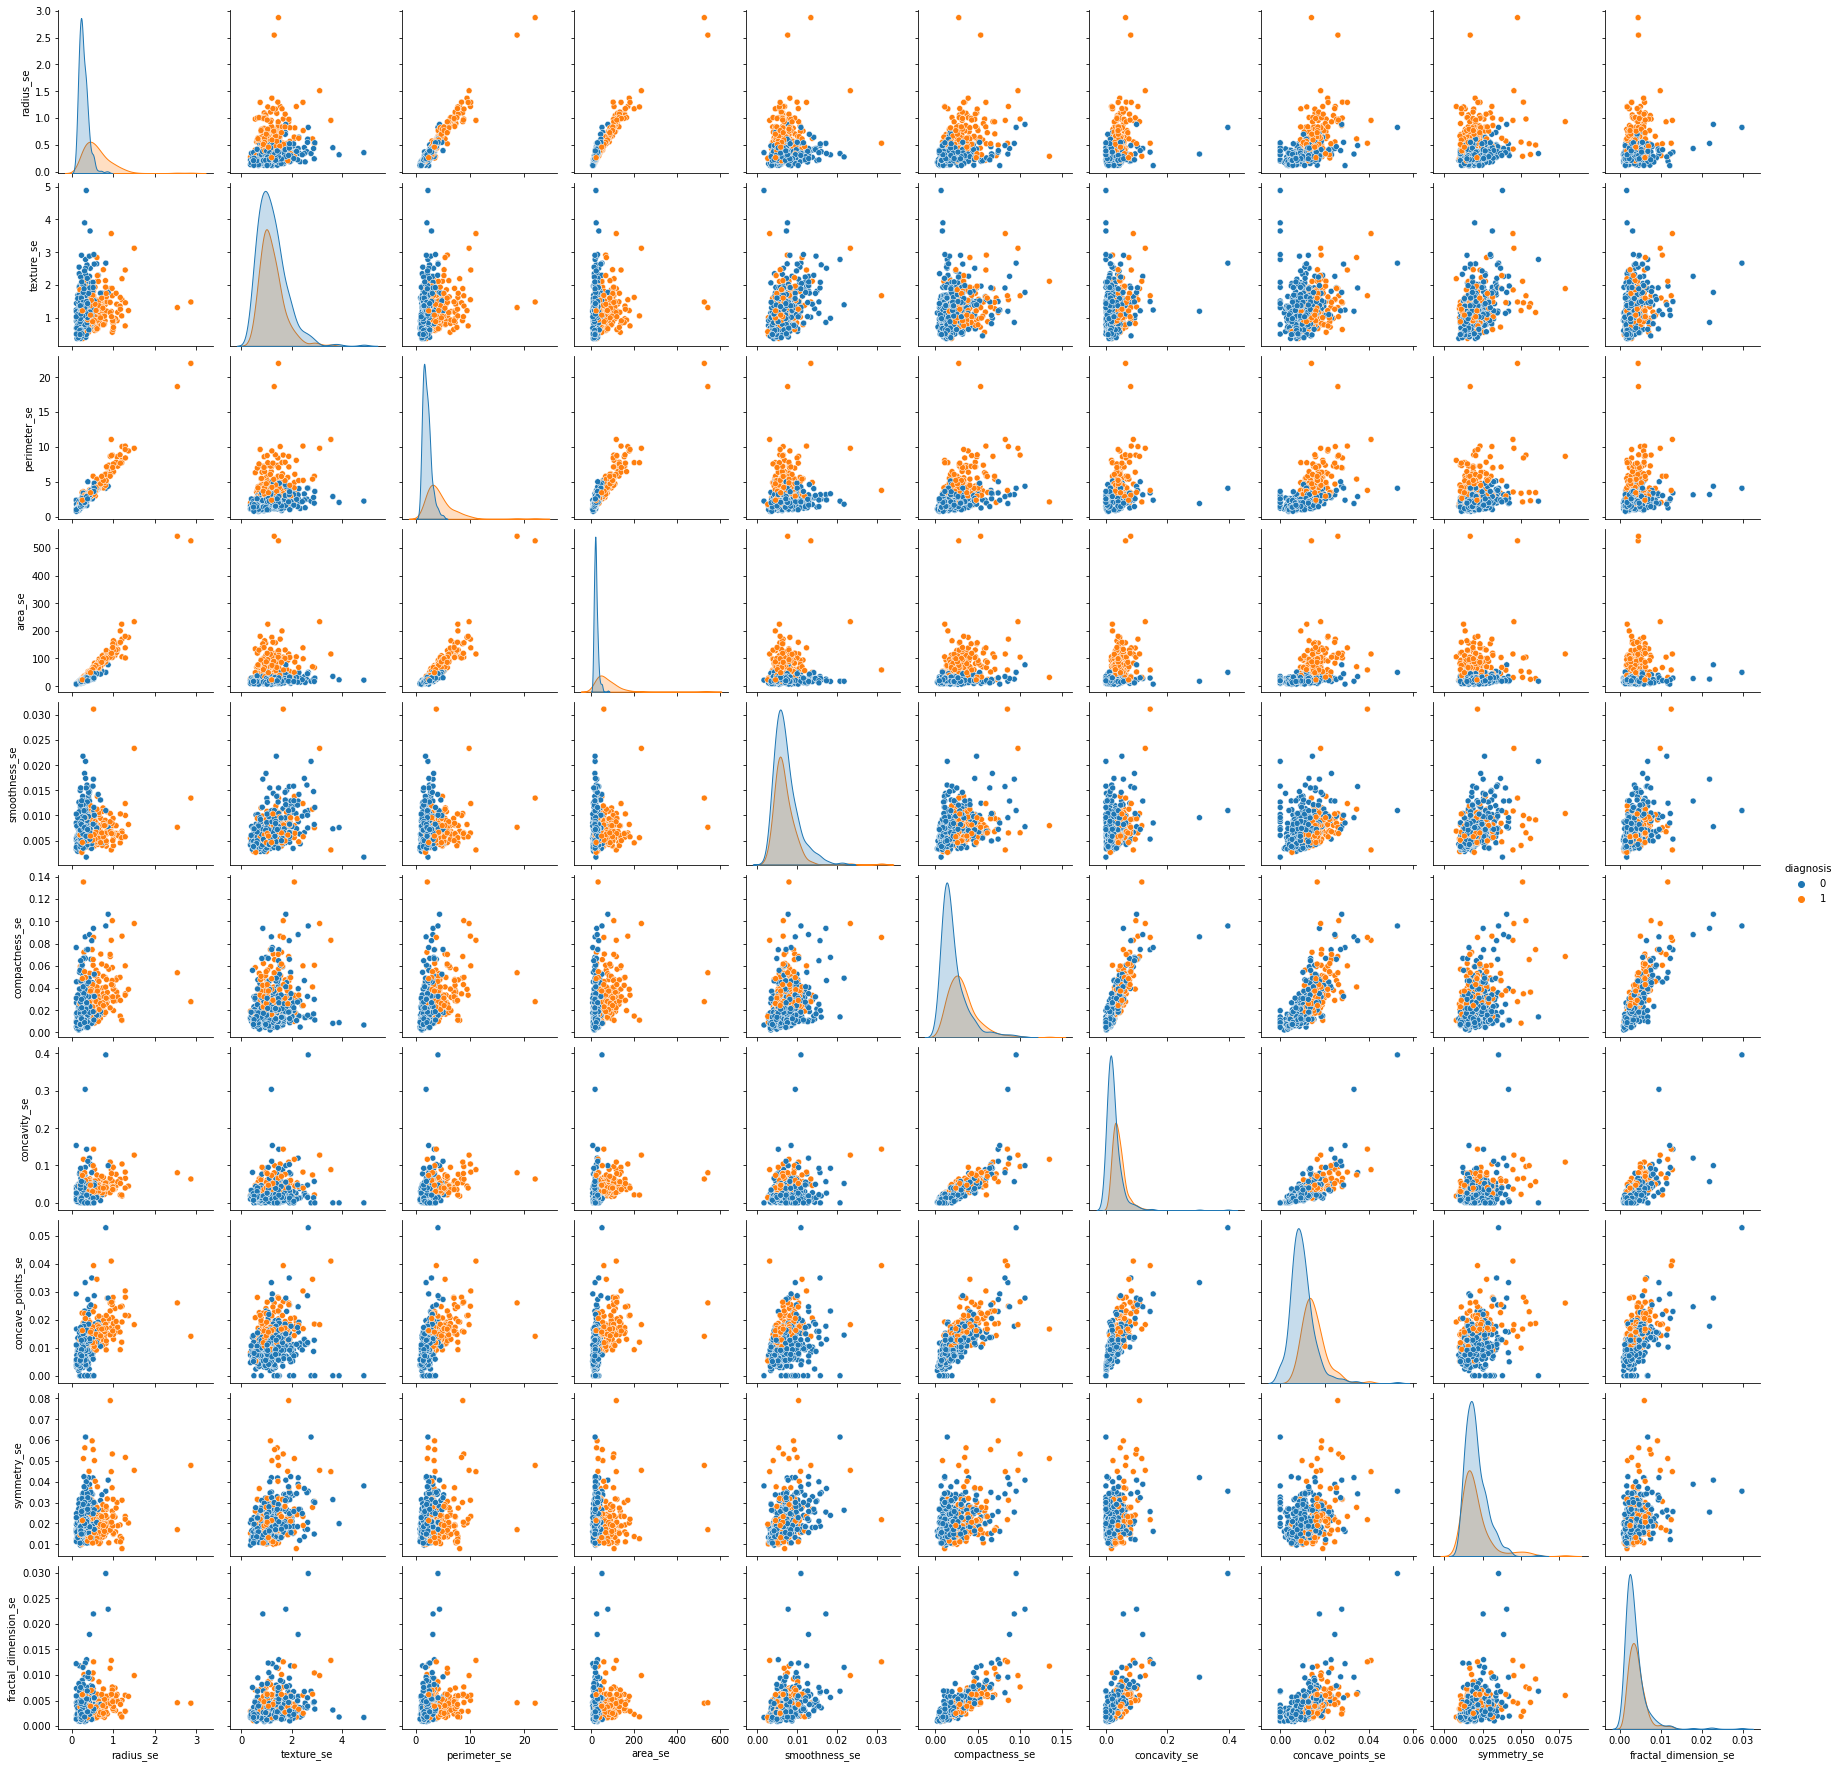

In [19]:
# Create a pairplot that displays the relationships between the ten real-valued features
sns.pairplot(data[['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se']],hue='diagnosis')

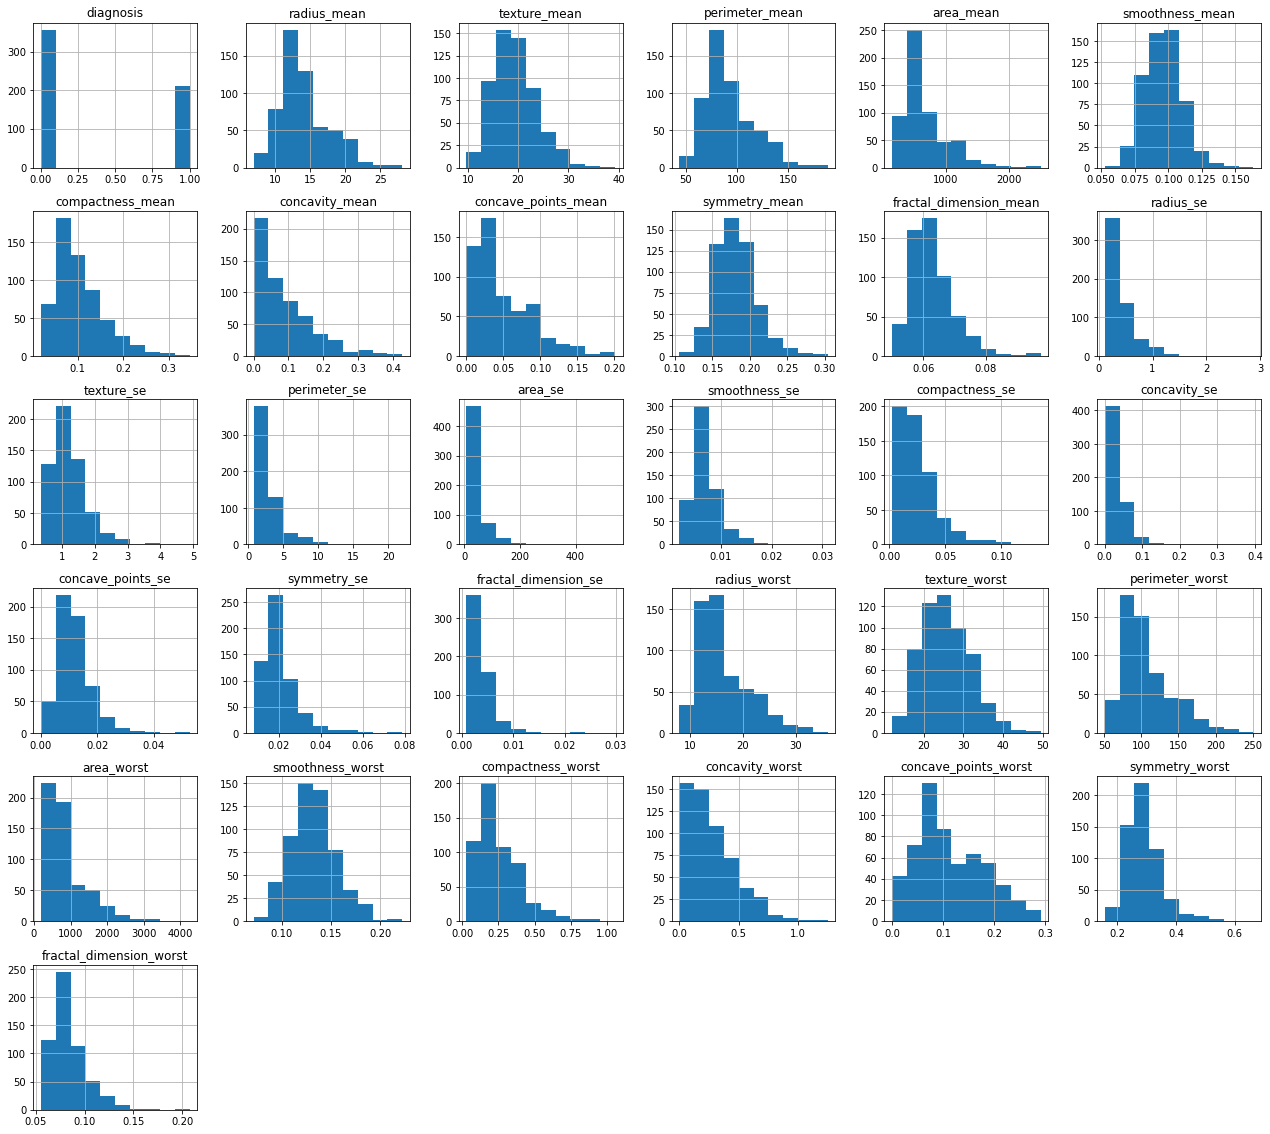

In [20]:
# Plot the histograms of the individual columns
data.hist(figsize=(22,20))
plt.show()

### Feature Selection

<AxesSubplot:>

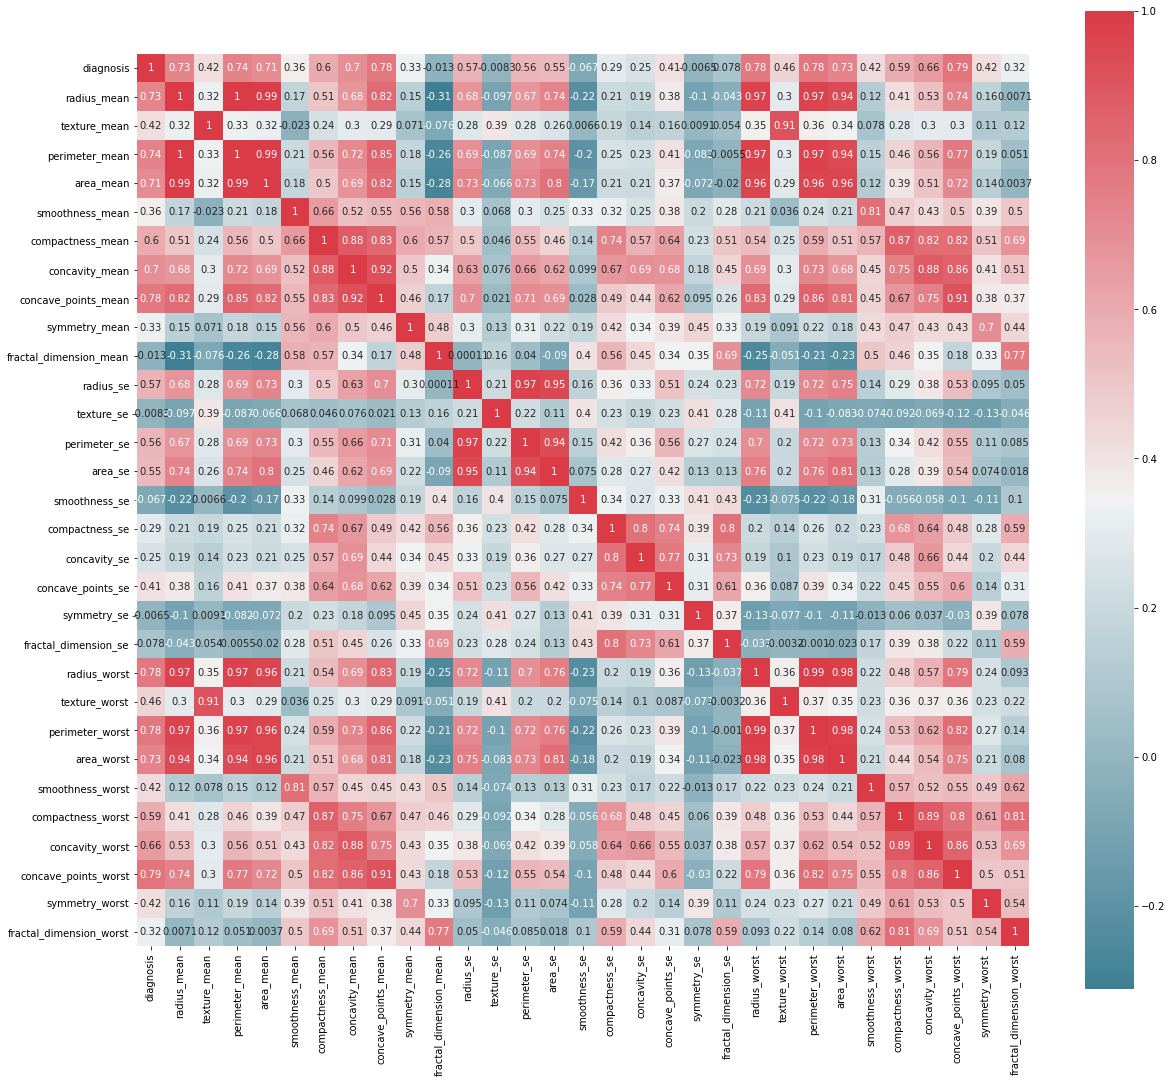

In [21]:
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(correlation_matrix, cmap=sns.diverging_palette(220,10, as_cmap = True), square=True, annot=True)

Almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables (they are highly linearly related). Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

Multicollinearity is a problem as it undermines the significance of independent variables and we fix it by removing the highly correlated predectors from the model.

In [22]:
bc_predictors = data.drop(['diagnosis'], axis=1)
#flatten correlation matrix
corr_series = bc_predictors.corr(method='pearson').stack().reset_index()
corr_series= corr_series.rename(columns={0:'corr'})
#remove auto correlation and duplicate rows
corr_series = corr_series[corr_series['level_0'].astype(str)!=corr_series['level_1'].astype(str)]
corr_series['ordered-cols'] = corr_series.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_series.drop_duplicates(['ordered-cols'], inplace=True)
corr_series.drop(['ordered-cols'], axis=1, inplace=True)

In [23]:
corr_series

,level_0,level_1,corr
1,radius_mean,texture_mean,0.323782
2,radius_mean,perimeter_mean,0.997855
3,radius_mean,area_mean,0.987357
4,radius_mean,smoothness_mean,0.170581
5,radius_mean,compactness_mean,0.506124
...,...,...,...
808,concavity_worst,symmetry_worst,0.532520
809,concavity_worst,fractal_dimension_worst,0.686511
838,concave_points_worst,symmetry_worst,0.502528
839,concave_points_worst,fractal_dimension_worst,0.511114


The flattened correlation matrix above allows us to work with the features in such a way that we can eliminate the variables that are highly correlated with each other. Since we saw that there were several variables with pairwise multicollinearity, we want to remove one of these features within every pair so that we are left with fewer features that we are using for our logistic regression model.

In [24]:
# Using the correlation matrix for the dataset potential predictor variables, 
# We remove one variable of each pair of variables that has a correlation coefficient higher thant 0.85
all_columns = pd.DataFrame(data.columns, columns =['col'])
all_columns['include'] = True
for index, row in  corr_series.iterrows():
    if row['corr'] > 0.85:
        all_columns.loc[all_columns['col'] == row['level_1'], 'include'] = False

all_columns = all_columns.drop(all_columns.loc[all_columns['include']==False].index)

columns = all_columns['col']

#This is the subset of the dataset we are going to use for our modeling
new_data = data[columns]
new_data.shape[1]

18

By removing the features that have a correlation coefficient of 0.85 or greater when compared pairwise with the other individual features, we are left with 18 variables (down from our original number of 31). We can redo our correlation matrix heatmap below and check that the remaining variables all have a correlation coefficient of 0.85 or less.

<ipython-input-25-ffc324bb1988>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


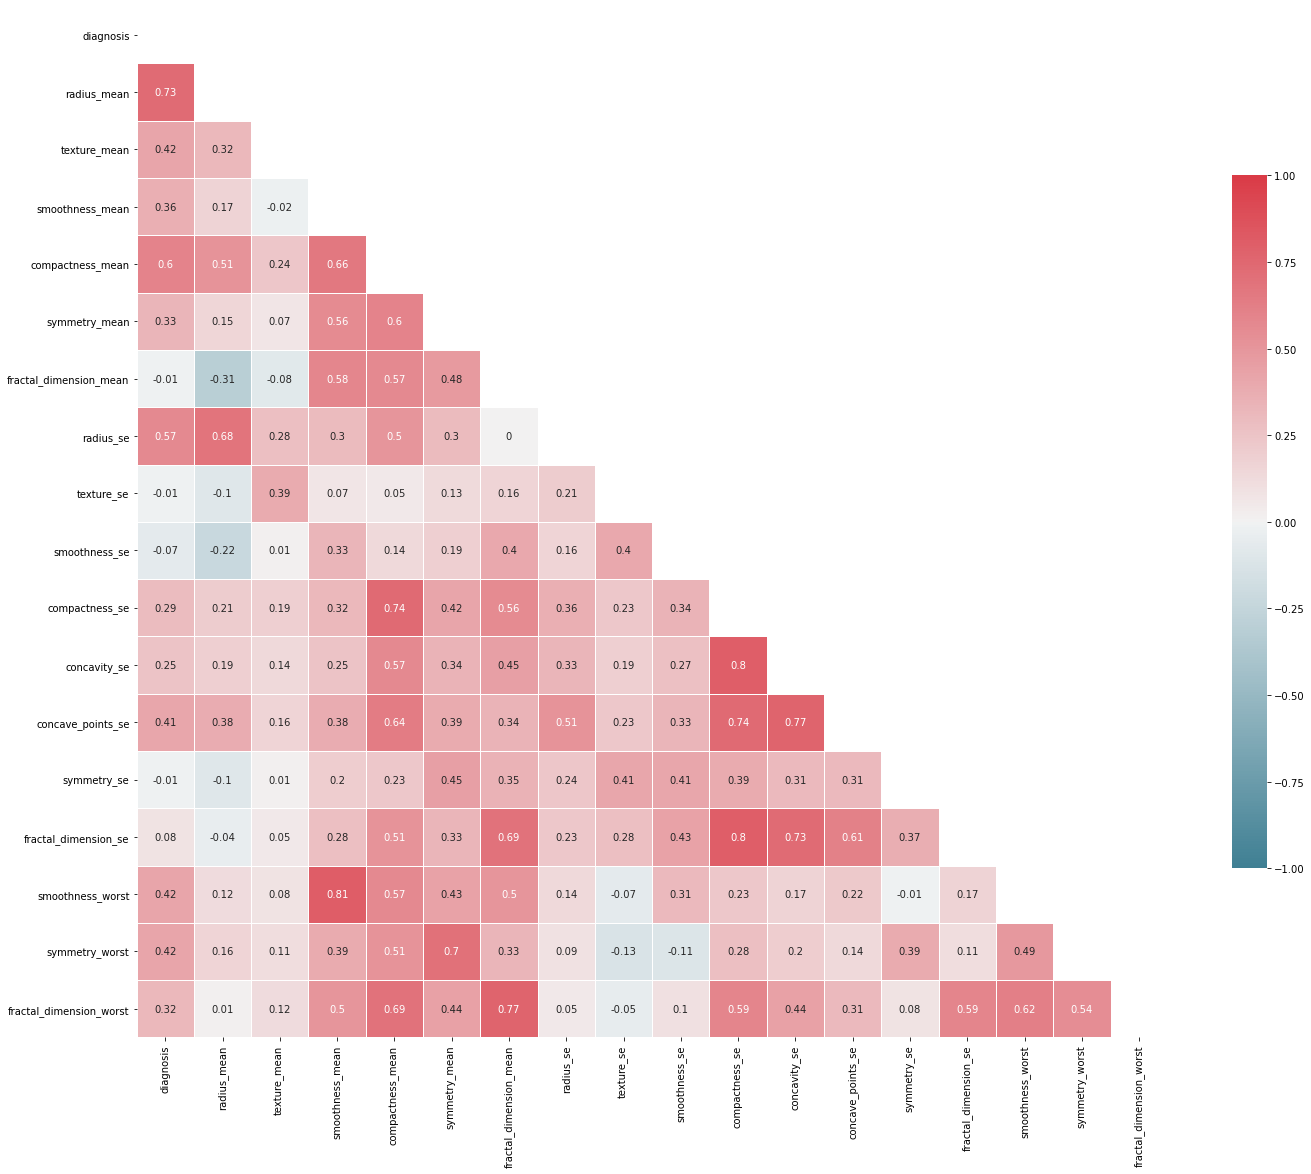

In [25]:
# Generate and visualize the correlation matrix
corr = new_data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set figure size
f, ax = plt.subplots(figsize = (20,20))

# Define custom colormap
cmap = sns.diverging_palette(220,10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {'shrink': .5}, annot = True)

plt.tight_layout()

The descriptive statistics for our 18 remaining features can be seen below:

In [26]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113


# Dataset Predictors and Predicted Bivariate Analysis 

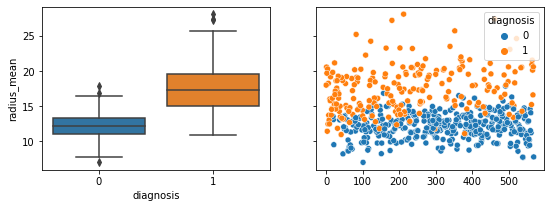

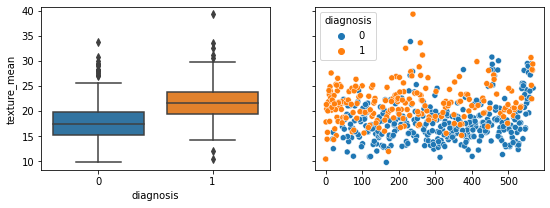

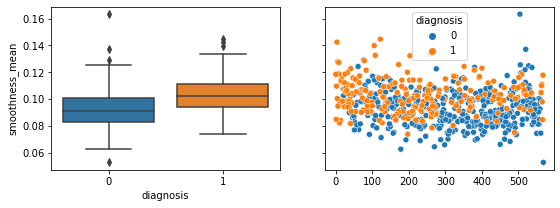

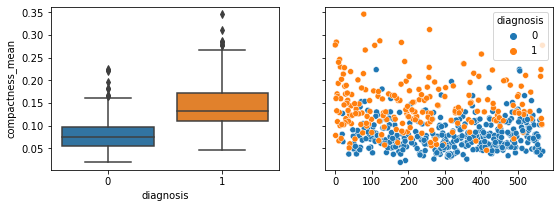

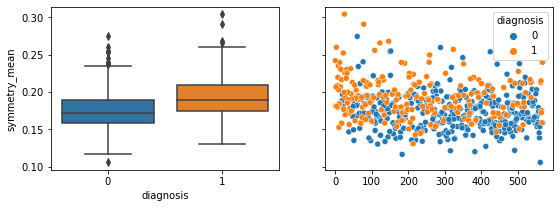

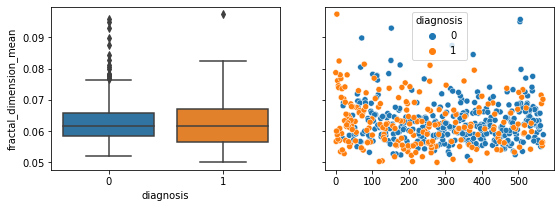

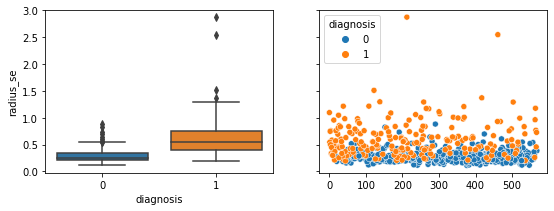

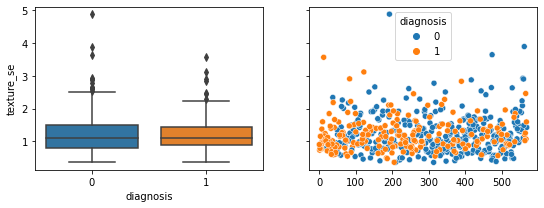

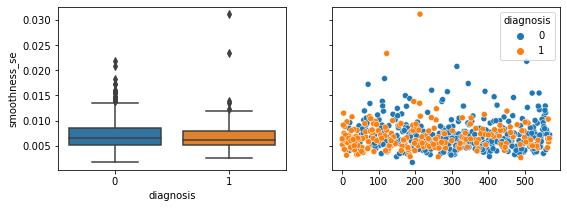

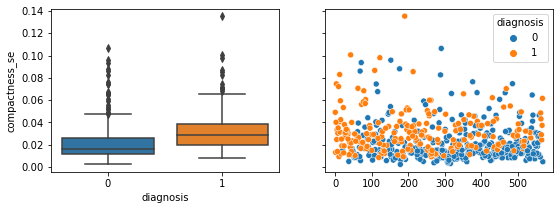

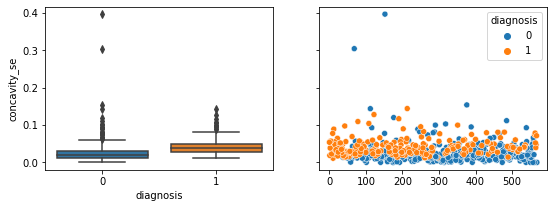

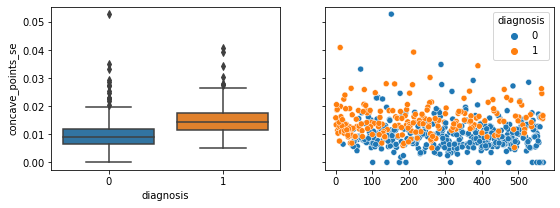

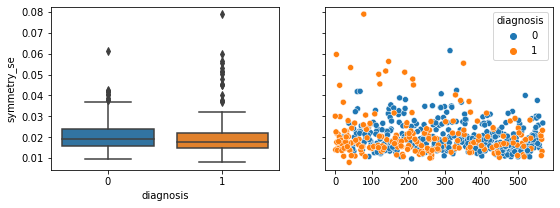

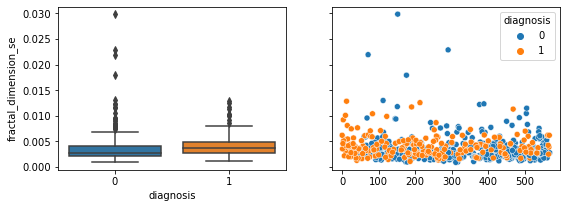

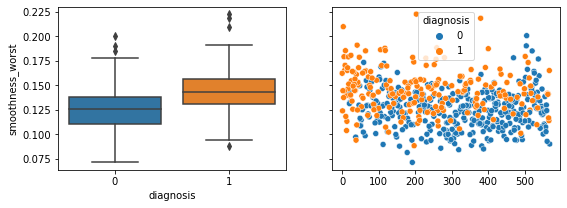

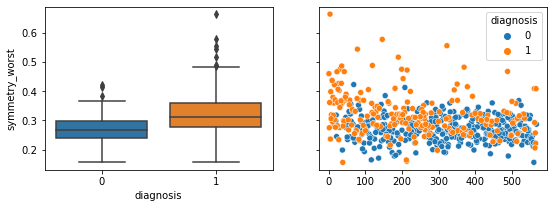

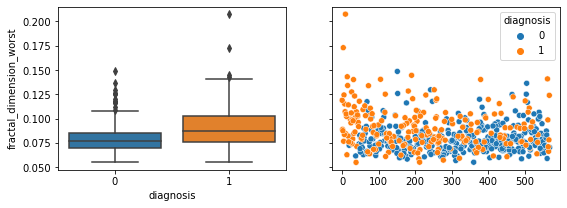

In [68]:
for variable in new_data.columns:
    if variable not in ['diagnosis', 'prediction', 'yhat']:
        fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(9, 3))
        sns.boxplot(x='diagnosis', y=variable, data=new_data, ax=axs[0])
        sns.scatterplot(x=new_data.index, y= variable, hue='diagnosis', data=new_data, ax=axs[1])                
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        plt.show() 

By examining the above plots, the most correlated predictors variables with the predicted variable, from the 17 non redundant retained, are: 
       - 'radius_mean' <br>
       - 'texture_mean' <br>
       - 'compactness_mean' <br>
       - 'symmetry_mean' <br>
       - 'radius_se'  <br>
       - 'compactness_se' <br>
       - concavity_se' <br>
       - 'concave_points_se'  <br>
       - 'smoothness_worst' <br>
       - 'symmetry_worst' <br>
       - 'fractal_dimension_worst' <br>
We could use these features as initial set predictors to use in the ML model, but we decided to use the p_value to eliminate the statistically insignificant predictors variables.

### Univariate Outlier Detection Using Variable Skewness and Z-Score

============================== Variable: radius_mean ==============================
Variable radius_mean skewness value: 0.9423795716730975


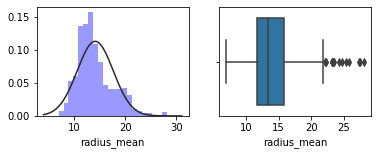

============================== Variable: texture_mean ==============================
Variable texture_mean skewness value: 0.6504495420828132


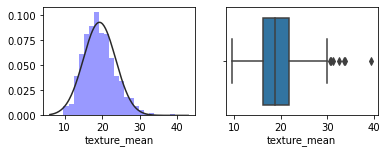

============================== Variable: smoothness_mean ==============================
Variable smoothness_mean skewness value: 0.4563237648195616


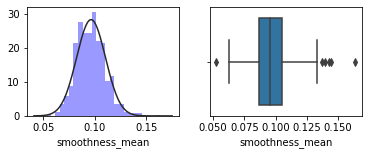

============================== Variable: compactness_mean ==============================
Variable compactness_mean skewness value: 1.1901230311980404


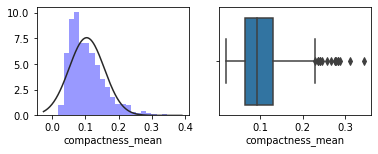

============================== Variable: symmetry_mean ==============================
Variable symmetry_mean skewness value: 0.7256089733642002


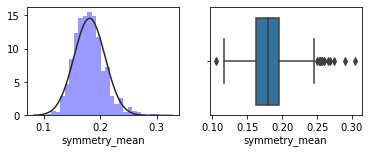

============================== Variable: fractal_dimension_mean ==============================
Variable fractal_dimension_mean skewness value: 1.3044888125755076


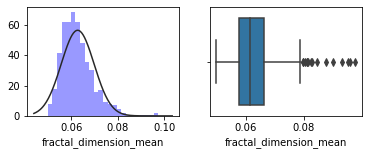

============================== Variable: radius_se ==============================
Variable radius_se skewness value: 3.0886121663847574


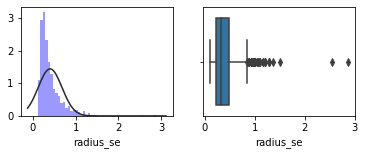

============================== Variable: texture_se ==============================
Variable texture_se skewness value: 1.646443808753053


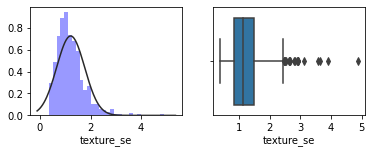

============================== Variable: smoothness_se ==============================
Variable smoothness_se skewness value: 2.31445005663676


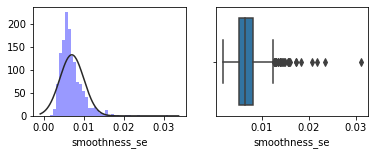

============================== Variable: compactness_se ==============================
Variable compactness_se skewness value: 1.902220709637856


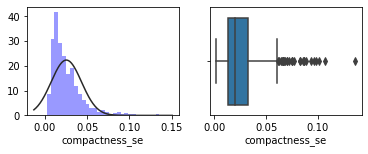

============================== Variable: concavity_se ==============================
Variable concavity_se skewness value: 5.110463049043661


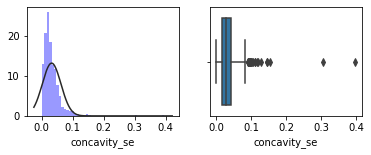

============================== Variable: concave_points_se ==============================
Variable concave_points_se skewness value: 1.4446781446974786


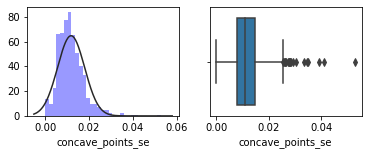

============================== Variable: symmetry_se ==============================
Variable symmetry_se skewness value: 2.1951328995478225


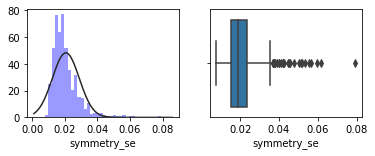

============================== Variable: fractal_dimension_se ==============================
Variable fractal_dimension_se skewness value: 3.9239686202274124


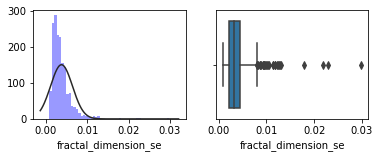

============================== Variable: smoothness_worst ==============================
Variable smoothness_worst skewness value: 0.41542599628246774


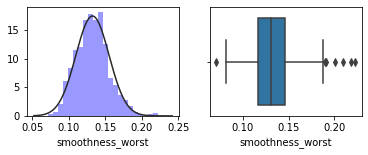

============================== Variable: symmetry_worst ==============================
Variable symmetry_worst skewness value: 1.4339277651893276


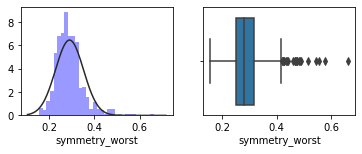

============================== Variable: fractal_dimension_worst ==============================
Variable fractal_dimension_worst skewness value: 1.6625792663955172


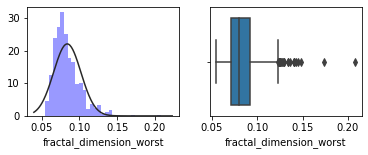

In [79]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
skewed_cols = pd.DataFrame(columns=('variable', 'skewness'))
for variable in new_data.columns:
    if variable not in ['diagnosis', 'prediction', 'yhat']:
        print('='*30, 'Variable:' , variable, '='*30)
        #print(new_data[variable].describe())
        print('Variable %s skewness value: %s' % (variable, new_data[variable].skew()))
        if new_data[variable].skew() > 2:
                values_to_add = {'variable': variable, 'skewness': new_data[variable].skew()}  
                row_to_add = pd.Series(values_to_add)
                skewed_cols=skewed_cols.append(row_to_add, ignore_index=True)
                
        fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
        sns.distplot(new_data[variable], label=variable, kde=False, fit=stats.norm, color='b', ax=axs[0])
        sns.boxplot(x=variable, data=new_data, ax=axs[1])                     
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        plt.show() 

In [98]:
print('Based on the skewness value, the columns with possible outliers issue (skewness > 2) are %s:' % skewed_cols)

Based on the skewness value, the columns with possible outliers issue (skewness > 2) are                variable  skewness
0             radius_se  3.088612
1         smoothness_se  2.314450
2          concavity_se  5.110463
3           symmetry_se  2.195133
4  fractal_dimension_se  3.923969:


### For columns with potential outliers issue risk, falgged by the high skewness value, we exam the z-score

In [113]:
skewed_cols_zcores=new_data[skewed_cols['variable']]
cols = list(skewed_cols_zcores.columns)
for col in cols:
    col_zscore = col + '_zscore'
    skewed_cols_zcores[col_zscore] = (skewed_cols_zcores[col] - skewed_cols_zcores[col].mean())/skewed_cols_zcores[col].std(ddof=0)

skewed_cols_zcores.drop(labels=skewed_cols['variable'], axis=1).describe([0.25, 0.5, 0.75, 0.90, 0.95])
                                                                          


<ipython-input-113-a6c7a0178ced>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skewed_cols_zcores[col_zscore] = (skewed_cols_zcores[col] - skewed_cols_zcores[col].mean())/skewed_cols_zcores[col].std(ddof=0)


,radius_se_zscore,smoothness_se_zscore,concavity_se_zscore,symmetry_se_zscore,fractal_dimension_se_zscore
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,2.497514e-16,4.245774e-16,-7.492542e-17,8.741299e-17,-6.243785e-18
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-1.059924e+00,-1.776065e+00,-1.057501e+00,-1.532890e+00,-1.096968e+00
25%,-6.235706e-01,-6.240183e-01,-5.571612e-01,-6.516807e-01,-5.851185e-01
50%,-2.922452e-01,-2.203352e-01,-1.990654e-01,-2.194304e-01,-2.299405e-01
75%,2.660996e-01,3.683553e-01,3.367521e-01,3.556925e-01,2.886421e-01
90%,1.240514e+00,1.123053e+00,8.828483e-01,1.159654e+00,9.042084e-01
95%,2.000758e+00,1.867749e+00,1.559782e+00,1.749064e+00,1.575378e+00
max,8.906909e+00,8.029999e+00,1.207268e+01,7.071917e+00,9.851593e+00


From the z-score descriptive statistics above all the 5 variables ('radius_se', 'smoothness_se_zscore', 'concavity_se','symmetry_se' and 'fractal_dimension_se') flagged by high skewness value, the z-score confirm that the outlier issue. However  we don't have proper subject matter expertise about the data to take proper decision on whether the data is an actual outlier or not and wether to removethem or retain them at this point. Later on if the logistic regression model performance is deemed not satisfactory, we could try to use an ML algorithm more robust to outliers like random forest classifier model.

### Logistic Regression Model and Evaluation

For our logistic regression model, we first want to split our main dataset into an x variable containing all of the predictor variables and a y variable containing the diagnosis variable that we are trying to predict.

In [30]:
x = new_data.drop(['diagnosis'],axis=1)
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.4087,0.12400


In [31]:
y = new_data.iloc[:, [0]]
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Now that we have an x and y portion of our dataset, we can further split our x and y into training and test sets so that we can first train our logistic regression model with the training set and see how well it does when run with the test set. Generally, the training set is done with 70-80% of the data, while the test set should be approximately 20-30% of the data. As seen below, the 569 data points are split in such a way that 455 data points are used for training and the remaining 114 data points can be tested against to see how our model will perform. For consistency, we'll set the random state to 0 so that we can get the same results every time we run our code to split this data.

In [32]:
#Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 17)
(114, 17)
(455, 1)
(114, 1)


In [33]:
x_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
338,10.050,17.53,0.10070,0.07326,0.1890,0.06331,0.2619,2.0150,0.007803,0.014490,0.01690,0.008043,0.02100,0.002778,0.14020,0.2894,0.07664
427,10.800,21.98,0.08801,0.05743,0.2016,0.05977,0.3077,1.6210,0.006543,0.021480,0.02991,0.010450,0.01844,0.002690,0.13030,0.2965,0.07662
406,16.140,14.86,0.09495,0.08501,0.1735,0.05875,0.2387,0.6372,0.003958,0.012460,0.01831,0.008747,0.01500,0.001621,0.12060,0.2778,0.07012
96,12.180,17.84,0.10450,0.07057,0.1900,0.06635,0.3661,1.5110,0.005433,0.011790,0.01131,0.015190,0.02220,0.003408,0.11400,0.2227,0.07376
490,12.250,22.44,0.08192,0.05200,0.1544,0.05976,0.2239,1.1390,0.005096,0.012050,0.00941,0.004551,0.01608,0.002399,0.12560,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,0.08923,0.05884,0.1550,0.04996,0.3283,0.8280,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,0.12430,0.2567,0.05737
9,12.460,24.04,0.11860,0.23960,0.2030,0.08243,0.2976,1.5990,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,0.18530,0.4366,0.20750
359,9.436,18.32,0.10090,0.05956,0.1506,0.06959,0.5079,1.2470,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,0.13330,0.2454,0.08136
192,9.720,18.22,0.06950,0.02344,0.1653,0.06447,0.3539,4.8850,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,0.07117,0.1909,0.06559


In [34]:
y_train

,diagnosis
338,0
427,0
406,0
96,0
490,0
...,...
277,1
9,1
359,0
192,0


In [35]:
#Fit the model using LogisticRegression in sklearn
logreg_model = LogisticRegression(random_state = 0)
logreg_model.fit(x_train, y_train)

C:\Users\Yamina\anaconda3\envs\DS-GroupProject\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [36]:
y_pred = logreg_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [37]:
y_pred.sum()

45

The above result shows the 114 data points that our sklearn logistic regression model predicted. To see how accurate our model is, we can compare the results with the actual data provided by the remaining 20% of our test set.

In [38]:
# Show accuracy score of prediction
print(metrics.accuracy_score(y_test, y_pred))

0.9122807017543859


In [39]:
metrics.confusion_matrix(y_test,y_pred)

array([[63,  4],
       [ 6, 41]], dtype=int64)

The confusion matrix above tells us that out of the 114 data points, the model correctly predicted 63 true negatives (correctly predicted as benign), 41 true positives (correctly predicted as malignant), 4 false positives (incorrectly predicted as malignant), and 6 false negatives (incorrectly predicted as benign). This gives our model an accuracy score of 91%. We can further look into the ratios of these true positives and true negatives by looking at the precision and recall values of our model as well as the F1 score. From the table below, the precision and recall values for our model seem to perform very well.

In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



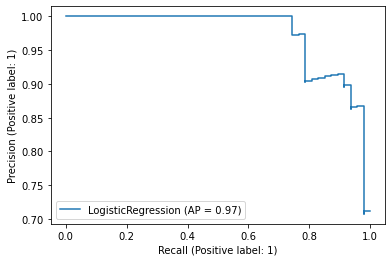

In [41]:
metrics.plot_precision_recall_curve(logreg_model,x_test,y_test)

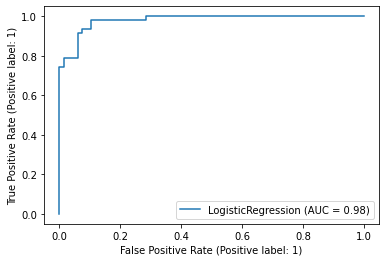

In [42]:
metrics.plot_roc_curve(logreg_model,x_test,y_test)

The Receiver Operator Characteristic (ROC) curve above tells us that with an area under the curve value of 0.98, our model's ability to correctly detect the difference between malignant and benign is quite remarkable.

In [43]:
# Calculating the R Squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.637980311209908

In [44]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.08771929824561403

In [45]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08771929824561403

With an R-Squared value of 0.63, the model explains the most of the variance within our dataset, signifying that our model fits the data quite well. This is further evidenced by the small mean squared error of 0.09.

### Logistic Regression Model Using Statsmodel and Feature Refinements with P-value

In [46]:
predictors = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se','concavity_se', 'concave_points_se','symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']
#new_data[predictors]
m = Logit(new_data['diagnosis'], new_data[predictors])
m = m.fit()
m.params

Optimization terminated successfully.
         Current function value: 0.081497
         Iterations 12


radius_mean                  0.482049
texture_mean                 0.226541
smoothness_mean            -33.508225
compactness_mean            96.003302
symmetry_mean              -59.615147
fractal_dimension_mean    -746.469182
radius_se                   15.987008
texture_se                   1.469797
smoothness_se              -17.465720
compactness_se            -170.739385
concavity_se                51.036406
concave_points_se          120.171998
symmetry_se                -52.195538
fractal_dimension_se      -139.255801
smoothness_worst            82.071802
symmetry_worst              35.893688
fractal_dimension_worst    145.700082
dtype: float64

In [47]:
print(m.summary2())

                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.877      
Dependent Variable:     diagnosis            AIC:                  126.7435   
Date:                   2021-08-02 09:19     BIC:                  200.5895   
No. Observations:       569                  Log-Likelihood:       -46.372    
Df Model:               16                   LL-Null:              -375.72    
Df Residuals:           552                  LLR p-value:          7.8766e-130
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         12.0000                                               
------------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------------------------
radius_mean                0.4820   0.1656  2.9109 0.0036     0.1575    0.8066
textu

The features for concave_points_se, symmetry_se, fractal_dimension_se, smoothness_se, texture_se and smoothness_mean have large p-values, so we are going to exclude them and re-model the remaining features.

In [48]:
predictors2 = ['radius_mean', 'texture_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se'             
              , 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [49]:
m2 = Logit(new_data['diagnosis'], new_data[predictors2])
m2 = m2.fit()
m2.params

Optimization terminated successfully.
         Current function value: 0.085580
         Iterations 11


radius_mean                  0.438662
texture_mean                 0.314254
compactness_mean            92.551892
symmetry_mean              -44.884347
fractal_dimension_mean    -738.085543
radius_se                   15.002453
compactness_se            -162.402284
concavity_se                54.695185
smoothness_worst            71.314711
symmetry_worst              26.132123
fractal_dimension_worst    130.366839
dtype: float64

In [50]:
print(m2.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.870      
Dependent Variable:      diagnosis           AIC:                 119.3905   
Date:                    2021-08-02 09:19    BIC:                 167.1732   
No. Observations:        569                 Log-Likelihood:      -48.695    
Df Model:                10                  LL-Null:             -375.72    
Df Residuals:            558                 LLR p-value:         4.5539e-134
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          11.0000                                             
-----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------
radius_mean                0.4387   0.1348  3.2530 0.0011    0.1744    0.7030
texture_mean      

The remaining features all have a p-value under 0.05, signifying that they have some importance to our model when considering the null hypothesis that each of these features does not make a significant difference. Therefore for each of these features, we can reject the null hypothesis that they do not carry any significance towards our model.

In [51]:
new_data.loc[:, 'prediction'] = m2.predict(new_data[predictors2])

C:\Users\Yamina\anaconda3\envs\DS-GroupProject\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Yamina\anaconda3\envs\DS-GroupProject\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


We are adding a new column to our dataset called 'prediction' so that we can see how this logistic regression model performs when comparing to the actual results carried by the diagnosis variable.

In [52]:
new_data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,prediction
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.4601,0.11890,1.000000
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2750,0.08902,0.998632
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.3613,0.08758,0.999999
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6638,0.17300,0.999386
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.2364,0.07678,0.999975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.2060,0.07115,1.000000
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.2572,0.06637,0.999994
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.2218,0.07820,0.985782
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.4087,0.12400,1.000000


Plot the relationship between the values of 𝐿𝑜𝑔𝑖𝑡(𝑝) and the odds 𝑝 along with the actual values of the label 'malignant'.

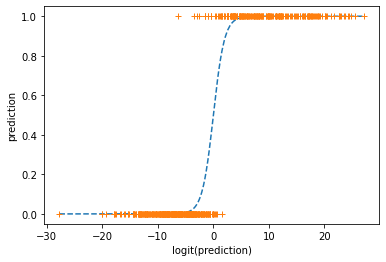

In [53]:
new_data = new_data.sort_values(by = ['prediction'], axis = 0)
plt.plot(logit(new_data.prediction), new_data.prediction, '--')
plt.plot(logit(new_data.prediction), new_data.diagnosis, '+')
plt.xlabel('logit(prediction)')
plt.ylabel('prediction')
plt.show()

Plot a boxplot to see the distribution of the estimated odds for both values of the label column 'malignant'.

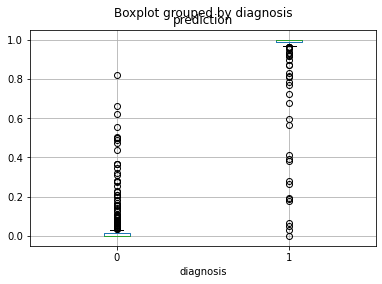

In [54]:
new_data.boxplot(column='prediction', by = 'diagnosis')
plt.show()

Derive the binary estimates  𝑦̂   of the response  𝑦 .

In [55]:
new_data.loc[:, 'yhat'] = (new_data.prediction > 0.5) * 1
new_data.yhat.value_counts()

0    364
1    205
Name: yhat, dtype: int64

In [56]:
confusion_matrix = m2.pred_table()
confusion_matrix

array([[352.,   5.],
       [ 12., 200.]])

Out of 569 observations, our model predicted 552 diagnoses correctly and 17 incorrectly. 352 of these can be identified as true negatives (correctly predicted as benign), 200 are true positives (correctly predicted as malignant), while 5 are false positives (incorrectly predicted as malignant) and 12 are false negatives (incorrectly predicted as benign).

In [57]:
# Model Accuracy
accuracy = 100*(confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()
accuracy

97.01230228471002

Compared to our prior model, the accuracy score of the logistic regression using Statsmodel after further eliminating variables with a p-value greater than 0.05 is 97%. The higher accuracy score could be attributed to the fact that our model is performing better with a reduced number of variables, but it could also be the fact that we were able to make the predicted versus actual comparision on all 569 data points rather than just 20% of the data points in our previous model. With a larger test set, we could find that the accuracy becomes inflated.